# Exploring Why Civil Resistance Works

This jupyter Notebook consists the first project assigned by Associate Professor Panos Louridas for the course Applied Machine Learning at the 7th Semester in the Department of Management Science and Technology (DMST) of the Athens University of Economics and Business (AUEB).

> Department of Management Science and Technology <br/>
> Konstantinos Babetas 8160078  <br/>
> kbabetas@gmail.com <br/>
> Github: [kbabetas](https://github.com/kbabetas) <br/>
> LinkedIn: [kbabetas](https://www.linkedin.com/in/kbabetas/)

### Data

The data that we will be using can be found here: [Why Civil Resistance Works (WCRW)](https://www.ericachenoweth.com/wp-content/uploads/2012/01/Data-and-Replication-Files-3.zip) 

The following answers assume that the data will reside in the same directory as this notebook inside a folder called "Data_and_Replication_Files".

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = [12, 10]

In [3]:
data_filename = 'Data_and_Replication_Files/WCRWreplication.dta'
data = pd.read_stata(data_filename)

### Adding the Decade

We will be dealing a lot with the decade of every campaign and Time Dummy variables that the author calculated will not be very helpful to us. 

As a result, we will be adding our own column which will transform every end year to its corresponding decade.



In [4]:
data['decade'] = (data['eyear']//10)*10
data

,defect,outcome,peakmembership,eyear,byear,location,campaign,target,lccode,tccode,...,ef,loclpolity1,loclcap1,loclcap2,loclcap3,loclcap4,mempc,demdum,recur1,decade
0,1.0,5,50000.0,1959,1956,Cuba,Cuban Revolution,Batista regime,40.0,40.0,...,0.213400,-9.0,0.0,1.0,0.0,0.0,1.226839,0.0,0.0,1950
1,0.0,3,5000.0,1920,1918,Haiti,Caco Revolt,U.S. occupation,41.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1920
2,1.0,5,30000.0,1985,1985,Haiti,,Jean Claude Duvalier,41.0,41.0,...,0.095000,-9.0,1.0,0.0,0.0,0.0,1.200712,0.0,0.0,1980
3,0.0,3,650.0,1924,1916,Dominican Republic,Dominican insurgency,U.S. occupation,42.0,2.0,...,NaN,NaN,1.0,0.0,0.0,0.0,NaN,0.0,NaN,1920
4,1.0,3,NaN,1965,1965,Dominican Republic,leftists,Loyalist regime,42.0,42.0,...,0.386800,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,1960
5,NaN,5,100000.0,1920,1910,Mexico,Liberals and Radicals rebellion,Diaz regime,70.0,70.0,...,NaN,-9.0,0.0,0.0,1.0,0.0,NaN,0.0,NaN,1920
6,1.0,3,50316.0,1924,1923,Mexico,Huerta led rebels,Obregon regime,70.0,70.0,...,NaN,-1.0,0.0,0.0,1.0,0.0,NaN,0.0,NaN,1920
7,0.0,3,50000.0,1930,1926,Mexico,Cristeros rebellion,Mexican regime,70.0,70.0,...,NaN,-3.0,0.0,0.0,1.0,0.0,NaN,0.0,NaN,1930
8,1.0,3,30000.0,1929,1929,Mexico,Escoban-led rebellion,Calles government,70.0,70.0,...,NaN,-3.0,0.0,0.0,1.0,0.0,NaN,0.0,NaN,1920
9,1.0,5,100000.0,2000,1987,Mexico,,corrupt govt,70.0,70.0,...,0.541779,-3.0,0.0,0.0,0.0,1.0,1.001202,NaN,0.0,2000


## 1. Frequency of Nonviolent and Violent Campaign End Years

Create a plot showing the frequency of nonviolent and violent campaigns; the frequency should be counted based on their end years, at decades. The violent and nonviolent campaign counts should be stacked on each other.

---------------------------------------------------------------------------------------------------------------------------------------


First we will start by focusing only on the columns that are useful to us for this question.

After that we will calculate the number of violent and nonviolent campaigns for every decade.

At this very initial stage we can observe that during the first decades most campaigns were violent and almost none were not violent. As the decades passed by that seems to change, but let's see first the diagram to get a better understanding.

In [5]:
campaign_type = data.loc[:, ['decade', 'nonviol', 'viol']]
campaign_type

,decade,nonviol,viol
0,1950,0,1
1,1920,0,1
2,1980,1,0
3,1920,0,1
4,1960,0,1
5,1920,0,1
6,1920,0,1
7,1930,0,1
8,1920,0,1
9,2000,1,0


In [6]:
type_per_decade = campaign_type.groupby('decade')['nonviol', 'viol'].agg(['sum'])

In [7]:
type_per_decade = type_per_decade.reset_index()
type_per_decade

,decade,nonviol,viol
,,sum,sum
0,1900,0,14
1,1910,1,8
2,1920,1,18
3,1930,1,14
4,1940,5,21
5,1950,9,19
6,1960,7,17
7,1970,7,26
8,1980,32,13


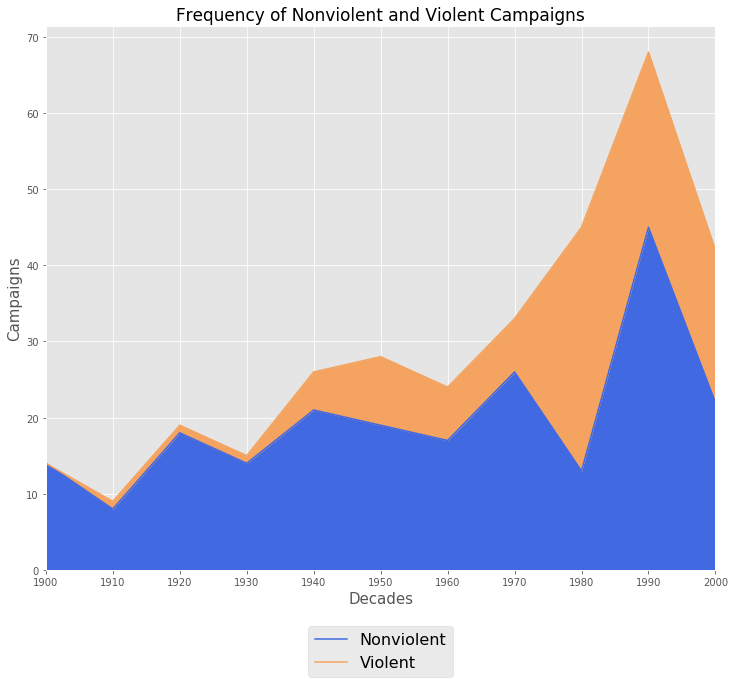

In [8]:
plt.style.use('ggplot')

decades = type_per_decade.decade

ax = type_per_decade.plot.area(x='decade', y=['viol', 'nonviol'],
                               color=['royalblue', 'sandybrown'])
plt.legend(["Nonviolent", "Violent"], loc='center', 
           bbox_to_anchor=(0.5, - 0.15), prop={'size': 16})

plt.xticks(decades)
plt.xlabel('Decades', fontsize=15)
plt.ylabel('Campaigns', fontsize=15)
plt.title('Frequency of Nonviolent and Violent Campaigns', fontsize = 17)
plt.show()

## 2: Number of Nonviolent Campaigns and Percentage of Success

Create a plot showing, for each decade from 1940 onwards, the number of nonviolent campaigns and the percentage of success. Your plot will have two vertical axes, one for each of the metrics, and it should look like this:

------------------------------------------------------------------------------------------------------------------------------------

First we need to focus only on the Nonviolent campaigns that happened after 1940.

Then, we need to calculate the total number of campaigns in each decade and the number that were actually successful

In [9]:
nonviolent = data.loc[data.nonviol==1]
nonviolent = nonviolent.loc[:, ['decade', 'success']]
nonviolent = nonviolent.loc[nonviolent.decade>=1940]
nonviolent = nonviolent.set_index('decade')
nonviolent = nonviolent.sort_index()
nonviolent = nonviolent.reset_index()
nonviolent

,decade,success
0,1940,0
1,1940,0
2,1940,1
3,1940,1
4,1940,0
5,1950,0
6,1950,0
7,1950,0
8,1950,0
9,1950,1


In [10]:
total_nonviol = nonviolent.groupby('decade').agg('count')
total_nonviol = total_nonviol.reset_index()
total_nonviol.rename(columns={'success' : 'total'}, inplace=True)
total_nonviol

,decade,total
0,1940,5
1,1950,9
2,1960,7
3,1970,7
4,1980,32
5,1990,23
6,2000,20


In [11]:
success_nonviol = nonviolent.loc[nonviolent.success == 1]
success_nonviol = success_nonviol.groupby('decade').agg('count')
success_nonviol = success_nonviol.reset_index()
success_nonviol

,decade,success
0,1940,2
1,1950,3
2,1960,3
3,1970,4
4,1980,17
5,1990,12
6,2000,14


In [12]:
success_total_nonviol = pd.merge(total_nonviol, success_nonviol, how='left', on='decade')
success_total_nonviol

,decade,total,success
0,1940,5,2
1,1950,9,3
2,1960,7,3
3,1970,7,4
4,1980,32,17
5,1990,23,12
6,2000,20,14


In [13]:
success_total_nonviol['percentage'] = success_total_nonviol['success']/success_total_nonviol['total']
success_total_nonviol = success_total_nonviol.loc[:, ['decade', 'total', 'percentage']]
success_total_nonviol

,decade,total,percentage
0,1940,5,0.400000
1,1950,9,0.333333
2,1960,7,0.428571
3,1970,7,0.571429
4,1980,32,0.531250
5,1990,23,0.521739
6,2000,20,0.700000


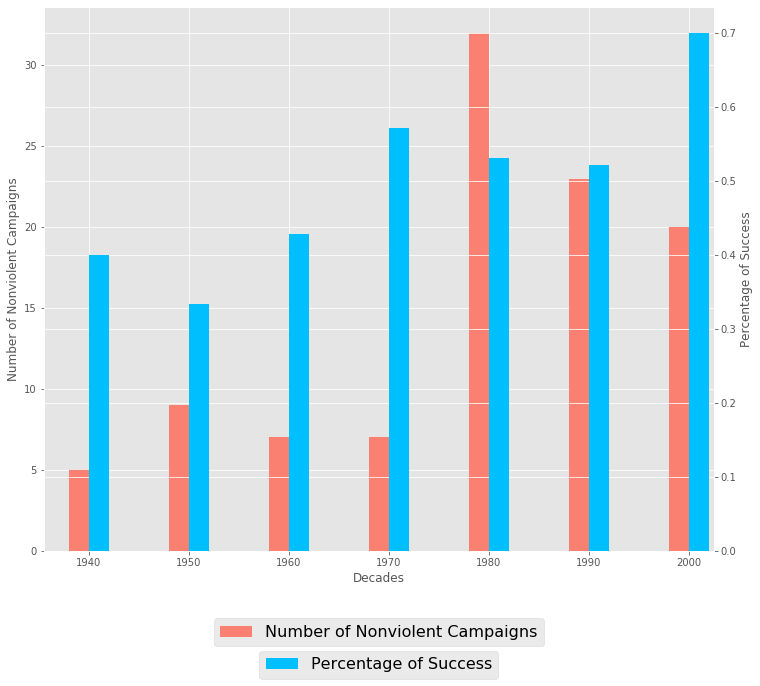

In [14]:
fig = plt.figure()
barWidth = 0.20

ax = fig.add_subplot(111)
ax2 = ax.twinx()

success_total_nonviol.percentage.plot(x=success_total_nonviol.decade, 
                                      kind='bar', color='deepskyblue', ax=ax2, 
                                      width=barWidth, position=0, 
                                      label ='Percentage of Success')
success_total_nonviol.total.plot(x=success_total_nonviol.decade, kind='bar', 
                                 color='salmon', 
                                 ax=ax, width=barWidth, position=1, 
                                 label='Number of Nonviolent Campaigns')


ax.set_xlabel('Decades')
ax.set_ylabel('Number of Nonviolent Campaigns')
ax2.set_ylabel('Percentage of Success')
ax.legend(['Number of Nonviolent Campaigns'], loc='center', 
          bbox_to_anchor=(0.5, - 0.15), prop={'size': 16})
ax2.legend(['Percentage of Success'], loc='center', 
           bbox_to_anchor=(0.5, - 0.21), prop={'size': 16})

ax.set_xticklabels(success_total_nonviol.decade, rotation="horizontal")

plt.show()

## 3: Success Rate by Decade

Create a plot showing the success rate for violent and nonviolent campaigns by decade.

________________________________________________________________________________________________

We already have the percentage of success for the nonviolent campaigns from the previous question.

In [15]:
nonviol_success = success_total_nonviol.loc[:, ['decade', 'percentage']]
nonviol_success

,decade,percentage
0,1940,0.400000
1,1950,0.333333
2,1960,0.428571
3,1970,0.571429
4,1980,0.531250
5,1990,0.521739
6,2000,0.700000


So we just need to do the same for the violent campaigns and caluclate their percentage of success

In [16]:
violent = data.loc[data.viol==1]
violent = violent.loc[:, ['decade', 'success']]
violent = violent.loc[violent.decade>=1940]
violent = violent.set_index('decade')
violent = violent.sort_index()
violent = violent.reset_index()
violent

,decade,success
0,1940,0
1,1940,0
2,1940,0
3,1940,0
4,1940,0
5,1940,0
6,1940,0
7,1940,1
8,1940,1
9,1940,0


In [17]:
total_viol = violent.groupby('decade').agg('count')
total_viol = total_viol.reset_index()
total_viol.rename(columns={'success' : 'total'}, inplace=True)
total_viol

,decade,total
0,1940,21
1,1950,19
2,1960,17
3,1970,26
4,1980,13
5,1990,45
6,2000,22


In [18]:
success_viol = violent.loc[violent.success == 1]
success_viol = success_viol.groupby('decade').agg('count')
success_viol = success_viol.reset_index()
success_viol

,decade,success
0,1940,7
1,1950,7
2,1960,4
3,1970,10
4,1980,5
5,1990,12
6,2000,3


In [19]:
viol_success = pd.merge(total_viol, success_viol, how='left', on='decade')
viol_success['viol_percentage'] = viol_success['success']/viol_success['total']
viol_success = viol_success.loc[:, ['decade', 'viol_percentage']]
viol_success

,decade,viol_percentage
0,1940,0.333333
1,1950,0.368421
2,1960,0.235294
3,1970,0.384615
4,1980,0.384615
5,1990,0.266667
6,2000,0.136364


Now that we have calculated the percentage of success for both types of campaigns we can merge the tables into one and create our plot

In [20]:
per_success = pd.merge(nonviol_success, viol_success, how='left', on='decade')
per_success.rename(columns={'percentage' : 'nonviol_percentage'}, inplace=True)
per_success

,decade,nonviol_percentage,viol_percentage
0,1940,0.400000,0.333333
1,1950,0.333333,0.368421
2,1960,0.428571,0.235294
3,1970,0.571429,0.384615
4,1980,0.531250,0.384615
5,1990,0.521739,0.266667
6,2000,0.700000,0.136364


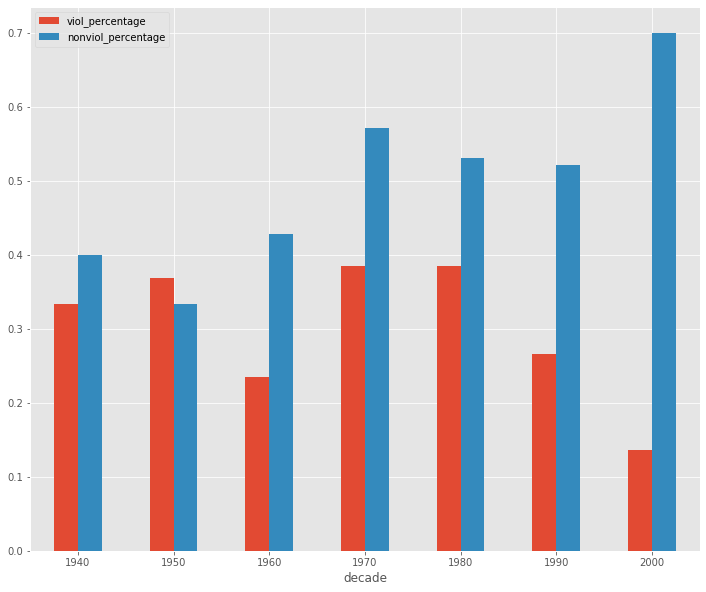

In [21]:
ax = per_success.plot.bar(x='decade', y=['viol_percentage', 'nonviol_percentage'])
ax.set_xticklabels(success_total_nonviol.decade, rotation="horizontal")
plt.show()

We can see that the nonviolent campaigns, with the exception of the decade of 1950, have a higher probability of success.

## 4. Twenty-Five Largest Resistance Campaigns, 1900-2006

Create a table with the twenty-five largest resistance campaigns, for all years, based on their number of members at highest point (peak membership). The table should include the membership, the start year, the end year, the location, the target, whether it was violent or not, and whether it was successful or not. Notice if you find anything about Greece.

___________________________________________________________________________________________________

In [22]:
peak = data.loc[:, ['peakmembership', 'byear', 'eyear', 'location',
                      'target', 'viol', 'success'] ]
peak = peak.set_index('peakmembership')
peak = peak.sort_index(ascending=False)
peak = peak.reset_index()
peak = peak.iloc[0:25]
peak

,peakmembership,byear,eyear,location,target,viol,success
0,4500000.0,1937,1945,China,Japanese occupation,1,0
1,2000000.0,1977,1979,Iran,Shah Reza Pahlavi,0,1
2,2000000.0,1986,1983,Philippines,Ferdinand Marcos,0,1
3,1000000.0,1988,1988,Burma,military junta,0,0
4,1000000.0,1989,1989,China,Communist regime,0,0
5,1000000.0,1967,1968,China,anti-Maoists,1,0
6,1000000.0,1922,1949,China,Kuomintang regime,1,1
7,1000000.0,2006,2006,Mexico,Calderon regime,0,0
8,1000000.0,2005,2005,Lebanon,Syrian forces,0,1
9,1000000.0,1993,1999,Nigeria,Military rule,0,1


## Karamanlis Regime

We can see that in the 25 largest resistance campaigns, at the number 17 we have Greece and the Karamanlis regime.

Let's first learn a bit about who Karamanlis was.

Konstantinos Karamanlis (8 March 1907 - 23 April 1998) was a very important political figure for Greece in the latter half of the 20th Century. He was appointed as Prime Minister 4 (four) times, thus making him the longest serving Prime Minister of modern Greece (14 years).

After World War II, Karamanlis surfaced to the political scene, he first became Minister of Labour in 1947 and in 1951 he became Minister of Public Works. In October 1955 he was appointed as Prime Minister by King Paul, after Papagos died. He then restructured the Greek Rally party and renamed it as National Radical Party. One of his significant achievements was that one of his first bills was to allow women to vote in elections.

His downfall started in 1960 when German Newspapers Haburger Echo and Der Spiegel made serious accusations towards Karamanlis in regard to the Merten Affair. To be precise, they accused Karamanlis that he was an informer in Thessaloniki during the Nazi occupation in Greece and that the, along with some other political figures, were rewarded with a business that belonged to a Greek Jew. He was also allegedly pressured to grant amnesty and release Merten from prison. Although Karamanlis rejected the claims, the Merten Affair remained at the centre of political discussion until the early 1961.

In the 1961 elections, the National Radical Union won 50.8% of the votes and 176 seats.
Both Opposition parties, EDA and the Centre Union, refused to recognise the result as they accused Karamanlis of electoral fraud, voter intimidation and other irregularities such as voting by deceased persons.

In 1963, Grigoris Lambrakis, a leftist member of Parliament, was assasinated and that shocked Karamanlis and Papandreou and his party The Centre Union found the opportunity to pressure him even more and accuse him that the country has become a para-state under his regime.

The final straw was Karamanlis'clash with the Palace in 1963, when Karamanlis opposed the trip of the royal pair to Britain and King Paul disregarded his advice.
Finally, in the 1963 election he and his party were defeated by George Papandreou and the Centre Union.

That in combination with the political tension and protest led Karamanlis to resign office and he willingly fled the country in a self-imposed exile in Paris for 11 years, where he lived under the name "Tryantafyllides".



## 5. The Effect of Participation on the Probability of Campaign Success

Examine the effect of participation on the probability of campaign success. You should run a logistic regression for success on membership per capita, controlling for the location’s logged population the year the campaign ends. Explain your results.

Having done that, create a scatter plot showing the logged participants per capita, on the $x$ axis, and the probability of success, on the $y$ axis.

__________________________________________________________________________________________________

In [23]:
from statsmodels.formula.api import logit

We will first run a logistic regression for success on membership per capita and for the location's logged population.

In [24]:
x = data.loc[:, ['success', 'mempc', 'lnpop', 'lmembers', 'peakmembership']]


In [25]:
participation = x.loc[x.mempc > 0]
participation

,success,mempc,lnpop,lmembers,peakmembership
0,1,1.226839,8.819231,10.819778,50000.0
2,1,1.200712,8.585698,10.308952,30000.0
9,1,1.001202,11.499098,11.512925,100000.0
12,1,0.741234,8.083094,5.991465,400.0
13,0,0.784924,9.317105,7.313221,1500.0
19,0,1.023090,8.503176,8.699514,6000.0
21,0,1.017789,7.866435,8.006368,3000.0
22,0,1.165337,8.161110,9.510445,13500.0
24,0,0.774153,7.739377,5.991465,400.0
30,0,0.844079,9.004961,7.600903,2000.0


In [26]:
success_mod = logit("success ~ mempc + lnpop", participation).fit()
success_mod.summary2()

Optimization terminated successfully.
         Current function value: 0.594790
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.129     
Dependent Variable: success          AIC:              199.9014  
Date:               2019-11-30 17:50 BIC:              209.1827  
No. Observations:   163              Log-Likelihood:   -96.951   
Df Model:           2                LL-Null:          -111.35   
Df Residuals:       160              LLR p-value:      5.5508e-07
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -5.8199    1.9207  -3.0301  0.0024  -9.5843  -2.0555
mempc          4.4892    0.9857   4.5545  0.0000   2.5573   6.4210
lnpop          0.0907    0.1285   0.7058  0.4803  -0.1612   0.3426
=================================================================

"""

### What do our results mean?

* One unit increase in the membership per capita brings an increase of 4.4892 in the log odds of a campaign being successful, which translates in an increase of $e^{4.4892} \approx 89.05$ or about 8805% .

* One unit increase in the logged population brings an increase of 0.0907 in the log odds of a campaign being successful, which translates in an increase of $e^{0.0907} \approx 1.09$ or about 9%.

* The intercept is the log odds of a campaign being successful when all the independent variables are held at zero; that is $e^{-5.8199} \approx 0.003$. That means that $p / (1-p) = 0,03$, or $p \approx 0.029$.

* The Pseudo R-squared that was calculated is very low. Thus the success of a campaign is not explained that well by the membership per capita and the logged population


Now we can create a scatter plot with the logged participants per capita, on the x axis, and the probability of success, on the y axis. 

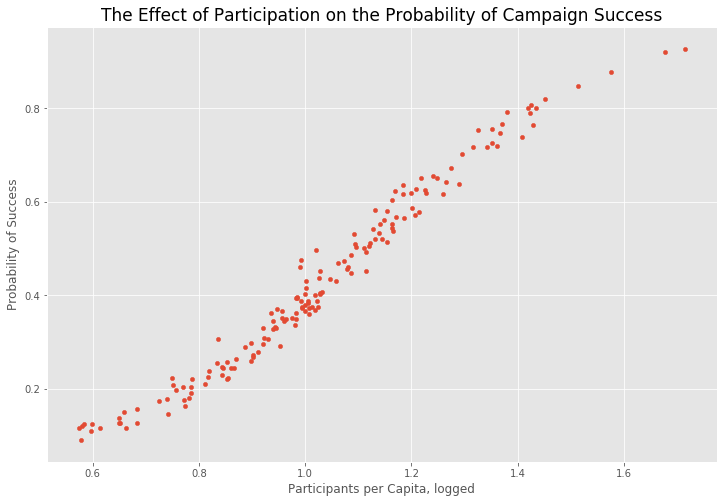

In [27]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.scatter(participation.mempc, success_mod.predict(), s=18)
ax.set_xlabel('Participants per Capita, logged')
ax.set_ylabel('Probability of Success')
ax.set_title('The Effect of Participation on the Probability of Campaign Success',
             fontsize = 17)
plt.show()

## 6. The Level of Participation Tipping Point

From the results you obtained in the previous question, find the percentage of the population that is the tipping point for success in a campaign.

___________________________________________________________________________________________________

In [28]:
reg_res = participation
reg_res = reg_res.reset_index()
del reg_res['index']
reg_res

,success,mempc,lnpop,lmembers,peakmembership
0,1,1.226839,8.819231,10.819778,50000.0
1,1,1.200712,8.585698,10.308952,30000.0
2,1,1.001202,11.499098,11.512925,100000.0
3,1,0.741234,8.083094,5.991465,400.0
4,0,0.784924,9.317105,7.313221,1500.0
5,0,1.023090,8.503176,8.699514,6000.0
6,0,1.017789,7.866435,8.006368,3000.0
7,0,1.165337,8.161110,9.510445,13500.0
8,0,0.774153,7.739377,5.991465,400.0
9,0,0.844079,9.004961,7.600903,2000.0


We will tabulate the table with the probability of success that we found during our logistic regression previously

In [29]:
pred = pd.DataFrame(success_mod.predict(), columns = ['prob_succes'])


In [30]:
reg_res['prob_success'] = pred
reg_res = reg_res.set_index('prob_success')
reg_res = reg_res.sort_index(ascending=False)
reg_res = reg_res.reset_index()
reg_res

,prob_success,success,mempc,lnpop,lmembers,peakmembership
0,0.927019,1,1.713917,7.358315,12.611538,300000.0
1,0.921259,1,1.677914,8.233740,13.815511,1000000.0
2,0.877381,1,1.575330,7.889913,12.429216,250000.0
3,0.847640,1,1.512668,8.216753,12.429216,250000.0
4,0.820082,1,1.451640,9.039682,13.122363,500000.0
5,0.807280,1,1.424579,9.447586,13.458836,700000.0
6,0.801195,1,1.420164,9.240030,13.122363,500000.0
7,0.800837,1,1.434430,8.509353,12.206073,200000.0
8,0.791073,1,1.380630,10.508722,14.508657,2000000.0
9,0.790409,0,1.422826,8.376560,11.918390,150000.0


In [31]:
reg_res['population'] = np.exp(reg_res['lnpop'])*1000
reg_res['participation'] = (reg_res['peakmembership']/reg_res['population'])
reg_res['population'] = reg_res['population'].map('{:.3f}'.format)
reg_res

,prob_success,success,mempc,lnpop,lmembers,peakmembership,population,participation
0,0.927019,1,1.713917,7.358315,12.611538,300000.0,1569190.125,0.191181
1,0.921259,1,1.677914,8.233740,13.815511,1000000.0,3765891.250,0.265541
2,0.877381,1,1.575330,7.889913,12.429216,250000.0,2670210.500,0.093626
3,0.847640,1,1.512668,8.216753,12.429216,250000.0,3702461.000,0.067523
4,0.820082,1,1.451640,9.039682,13.122363,500000.0,8431099.000,0.059304
5,0.807280,1,1.424579,9.447586,13.458836,700000.0,12677525.000,0.055216
6,0.801195,1,1.420164,9.240030,13.122363,500000.0,10301351.000,0.048537
7,0.800837,1,1.434430,8.509353,12.206073,200000.0,4960950.500,0.040315
8,0.791073,1,1.380630,10.508722,14.508657,2000000.0,36633644.000,0.054595
9,0.790409,0,1.422826,8.376560,11.918390,150000.0,4344040.500,0.034530


### Tipping Point

Now that we have plotted our results, we can say that the the tipping point for success in a campaign is the lowest percentage of population that has probability of success of over 50% as shown by the line in the above plot.

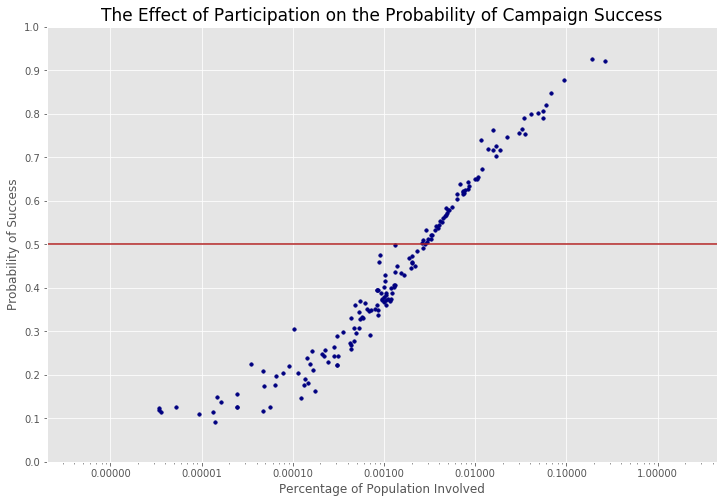

In [32]:
from matplotlib.ticker import FormatStrFormatter
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(111)
plt.gca().set_xscale("log")
ax.scatter(reg_res['participation'], reg_res['prob_success'], s=13, color = 'navy')
ax.set_xlabel('Percentage of Population Involved')
ax.set_ylabel('Probability of Success')
ax.set_title('The Effect of Participation on the Probability of Campaign Success',
             fontsize = 17)
plt.axhline(y=0.5, color='firebrick', linestyle='-')
plt.yticks(np.arange(0,1.1, 0.1))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.5f'))
plt.show()

In [33]:
above_50 = reg_res.loc[reg_res.prob_success>=0.5]
above_50

,prob_success,success,mempc,lnpop,lmembers,peakmembership,population,participation
0,0.927019,1,1.713917,7.358315,12.611538,300000.0,1569190.125,0.191181
1,0.921259,1,1.677914,8.233740,13.815511,1000000.0,3765891.250,0.265541
2,0.877381,1,1.575330,7.889913,12.429216,250000.0,2670210.500,0.093626
3,0.847640,1,1.512668,8.216753,12.429216,250000.0,3702461.000,0.067523
4,0.820082,1,1.451640,9.039682,13.122363,500000.0,8431099.000,0.059304
5,0.807280,1,1.424579,9.447586,13.458836,700000.0,12677525.000,0.055216
6,0.801195,1,1.420164,9.240030,13.122363,500000.0,10301351.000,0.048537
7,0.800837,1,1.434430,8.509353,12.206073,200000.0,4960950.500,0.040315
8,0.791073,1,1.380630,10.508722,14.508657,2000000.0,36633644.000,0.054595
9,0.790409,0,1.422826,8.376560,11.918390,150000.0,4344040.500,0.034530


In [34]:
tipping_point = above_50['participation'].min()
tipping_point * 100

0.2622985907483615

As a result, we will consider as a tipping point for success in a campaign the 0.26% of the population

In [35]:
bet = reg_res.loc[reg_res.participation >= tipping_point]
bet

,prob_success,success,mempc,lnpop,lmembers,peakmembership,population,participation
0,0.927019,1,1.713917,7.358315,12.611538,300000.0,1569190.125,0.191181
1,0.921259,1,1.677914,8.233740,13.815511,1000000.0,3765891.250,0.265541
2,0.877381,1,1.575330,7.889913,12.429216,250000.0,2670210.500,0.093626
3,0.847640,1,1.512668,8.216753,12.429216,250000.0,3702461.000,0.067523
4,0.820082,1,1.451640,9.039682,13.122363,500000.0,8431099.000,0.059304
5,0.807280,1,1.424579,9.447586,13.458836,700000.0,12677525.000,0.055216
6,0.801195,1,1.420164,9.240030,13.122363,500000.0,10301351.000,0.048537
7,0.800837,1,1.434430,8.509353,12.206073,200000.0,4960950.500,0.040315
8,0.791073,1,1.380630,10.508722,14.508657,2000000.0,36633644.000,0.054595
9,0.790409,0,1.422826,8.376560,11.918390,150000.0,4344040.500,0.034530


In [36]:
results = bet.loc[:, ['success', 'lnpop']]
results = results.groupby('success').count()
results = results.reset_index()
results.rename(columns = {'lnpop' : 'count'}, inplace = True)
results['desc'] = ['Not Successful', 'Successful']
del results['success']
results

,count,desc
0,24,Not Successful
1,36,Successful


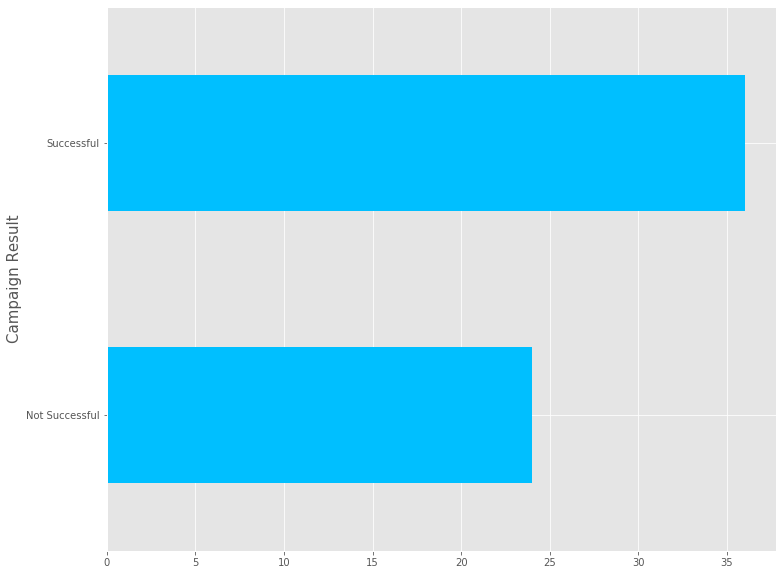

In [37]:
results.plot(kind='barh', x='desc', y='count', color='deepskyblue', legend=False)
plt.ylabel('Campaign Result', fontsize=15)
plt.show()

We can now see that the tipping point we selected with the data that we have shows that 36 of the campaigns are successful and 24 are not. 

If we transform that into percentages, a campaign with a population percentage involved in the campaign over the tipping point that we selected would have a chance of a 60% to actually be successful. Thus, we have selected a good tipping point in our calculations.

If we wanted to improve our chances even more we can check our plots again.

First, we plot only the campaigns that had over 50% of participation.

However we do not get a much clearer image over this.

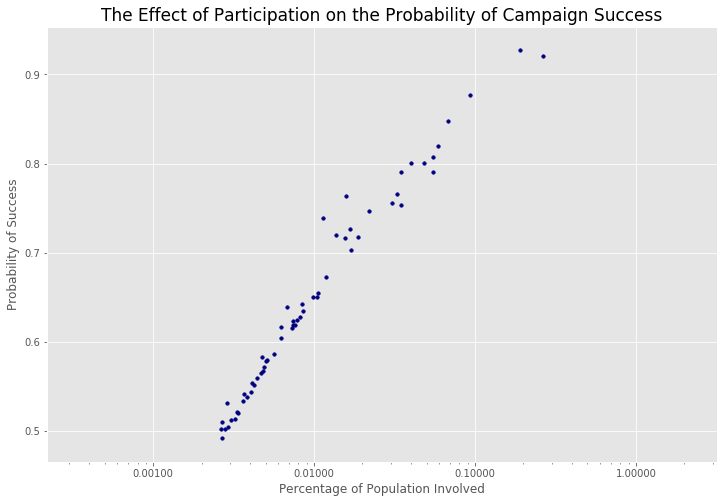

In [38]:
from matplotlib.ticker import FormatStrFormatter
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(111)
plt.gca().set_xscale("log")
ax.scatter(bet['participation'], bet['prob_success'], s=13, color = 'navy')
ax.set_xlabel('Percentage of Population Involved')
ax.set_ylabel('Probability of Success')
ax.set_title('The Effect of Participation on the Probability of Campaign Success',
             fontsize = 17)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.5f'))
plt.show()

If we, however, draw a different plot that would show the probability of success and the actual outcome we can see that most unsuccessful campaigns have happened with a percentage of population below 60%

Therefore if we choose our threshold more strictly, set it to 60% we will have:

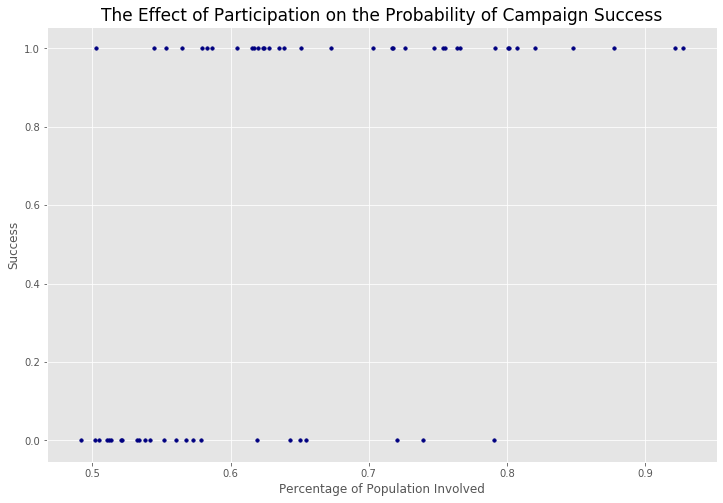

In [39]:
from matplotlib.ticker import FormatStrFormatter
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(111)

ax.scatter(bet['prob_success'], bet['success'], s=13, color = 'navy')
ax.set_xlabel('Percentage of Population Involved')
ax.set_ylabel('Success')
ax.set_title('The Effect of Participation on the Probability of Campaign Success',
             fontsize = 17)

plt.show()

In [40]:
above_60 = reg_res.loc[reg_res.prob_success>=0.6]
above_60

,prob_success,success,mempc,lnpop,lmembers,peakmembership,population,participation
0,0.927019,1,1.713917,7.358315,12.611538,300000.0,1569190.125,0.191181
1,0.921259,1,1.677914,8.233740,13.815511,1000000.0,3765891.250,0.265541
2,0.877381,1,1.575330,7.889913,12.429216,250000.0,2670210.500,0.093626
3,0.847640,1,1.512668,8.216753,12.429216,250000.0,3702461.000,0.067523
4,0.820082,1,1.451640,9.039682,13.122363,500000.0,8431099.000,0.059304
5,0.807280,1,1.424579,9.447586,13.458836,700000.0,12677525.000,0.055216
6,0.801195,1,1.420164,9.240030,13.122363,500000.0,10301351.000,0.048537
7,0.800837,1,1.434430,8.509353,12.206073,200000.0,4960950.500,0.040315
8,0.791073,1,1.380630,10.508722,14.508657,2000000.0,36633644.000,0.054595
9,0.790409,0,1.422826,8.376560,11.918390,150000.0,4344040.500,0.034530


In [41]:
tipping_point60 = above_60['participation'].min()
tipping_point60 * 100

0.6270390683463556

In [42]:
bet60 = reg_res.loc[reg_res.participation >= tipping_point60]
bet60

,prob_success,success,mempc,lnpop,lmembers,peakmembership,population,participation
0,0.927019,1,1.713917,7.358315,12.611538,300000.0,1569190.125,0.191181
1,0.921259,1,1.677914,8.233740,13.815511,1000000.0,3765891.250,0.265541
2,0.877381,1,1.575330,7.889913,12.429216,250000.0,2670210.500,0.093626
3,0.847640,1,1.512668,8.216753,12.429216,250000.0,3702461.000,0.067523
4,0.820082,1,1.451640,9.039682,13.122363,500000.0,8431099.000,0.059304
5,0.807280,1,1.424579,9.447586,13.458836,700000.0,12677525.000,0.055216
6,0.801195,1,1.420164,9.240030,13.122363,500000.0,10301351.000,0.048537
7,0.800837,1,1.434430,8.509353,12.206073,200000.0,4960950.500,0.040315
8,0.791073,1,1.380630,10.508722,14.508657,2000000.0,36633644.000,0.054595
9,0.790409,0,1.422826,8.376560,11.918390,150000.0,4344040.500,0.034530


In [43]:
results60 = bet60.loc[:, ['success', 'lnpop']]
results60 = results60.groupby('success').count()
results60 = results60.reset_index()
results60.rename(columns = {'lnpop' : 'count'}, inplace = True)
results60['desc'] = ['Not Successful', 'Successful']
del results60['success']
results60

,count,desc
0,7,Not Successful
1,29,Successful


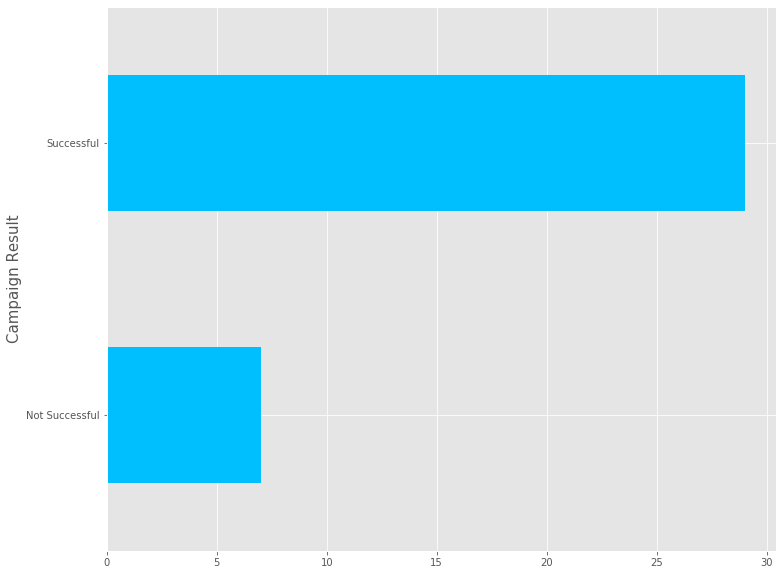

In [44]:
results60.plot(kind='barh', x='desc', y='count', color='deepskyblue', legend=False)
plt.ylabel('Campaign Result', fontsize=15)
plt.show()

So if we set our tipping point to 0.62% percent of the population, in a total of 36 campaigns we would have a 80.55% chance of that campaign being successful.

Disclaimer: The more strict we become in our calculations, the better the percentage will be.
The 50% in the probability of success that we set is the minimum that we can go without compromising our actual chances of success.
The 60% that we put here as a threshold improves a lot our chances without making the whole process redundant as would have happened if we had put an absurdly high probability (i.e. over 70% of success).

## 7. Nonviolent Resistance, Target Regime Type, Geographical Location

1. Examine whether nonviolent resistance remains significant even if we control for the regime type. Run a logistic   regression of success on the nonviolence indicator controlling for the POLITY IV score of campaign target (`tpolity`), the log of peakmembership, and the location’s logged population the year the campaign ends.

2. Examine whether nonviolent resistance remains significant even if we control for geographical location of the compaign.

___________________________________________________________________________________________________________________

In [45]:
nonviol_res = logit("success ~ nonviol+tpolity + lmembers + lnpop", data).fit()
nonviol_res.summary2()

Optimization terminated successfully.
         Current function value: 0.567143
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.163     
Dependent Variable: success          AIC:              169.9344  
Date:               2019-11-30 17:51 BIC:              184.6782  
No. Observations:   141              Log-Likelihood:   -79.967   
Df Model:           4                LL-Null:          -95.506   
Df Residuals:       136              LLR p-value:      2.9528e-06
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -0.1085    1.4130  -0.0768  0.9388  -2.8779   2.6609
nonviol        0.9048    0.4636   1.9517  0.0510  -0.0038   1.8134
tpolity        0.0520    0.0298   1.7439  0.0812  -0.0064   0.1104
lmembers       0.3751    0.1282   2.9264  0.0034   0.1239   0.6263
lnpop         -0.4363    0.1423  -3.0671  0.0022  -0.7151  -0.1575
=================================================================

"""

### What do our results mean?

* One unit increase in the nonviolence indicator brings an increase of 0.9048 in the log odds of a campaign being successful, which translates in an increase of $e^{0.9048} \approx 2.47$ or about 147% .

* One unit increase in the polity IV score of campaign target brings an increase of 0.0520 in the log odds of a campaign being successful, which translates in an increase of $e^{0.0520} \approx 1.053$ or about 5.3%.

* One unit increase in the log of peakmembership brings an increase of 0.3751 in the log odds of a campaign being successful, which translates in an increase of $e^{0.3751} \approx 1.46$ or about 46%.

* One unit increase in the logged population brings a decrease of 0.4363 in the log odds of a campaign being successful, which translates in a decrease of $e^{-0.4363} \approx 0.65$ or about -0.35%.

* The intercept is the log odds of a campaign being successful when all the independent variables are held at zero; that is $e^{-0.1085} \approx 0.9$. That means that $p / (1-p) = 0.9$, or $p \approx 0.53$.

* The Pseudo R-squared that was calculated is very low. Thus the success of a campaign is not explained that well by the membership per capita and the logged population


In [46]:
nonviol_res2 = logit("success ~ nonviol+lccode ", data).fit()
nonviol_res2.summary2()

Optimization terminated successfully.
         Current function value: 0.603612
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.065     
Dependent Variable: success          AIC:              395.9336  
Date:               2019-11-30 17:51 BIC:              407.2666  
No. Observations:   323              Log-Likelihood:   -194.97   
Df Model:           2                LL-Null:          -208.47   
Df Residuals:       320              LLR p-value:      1.3696e-06
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -0.7061    0.2976  -2.3724  0.0177  -1.2894  -0.1228
nonviol        1.2019    0.2509   4.7903  0.0000   0.7101   1.6937
lccode        -0.0008    0.0005  -1.4487  0.1474  -0.0018   0.0003
=================================================================

"""

### What do our results mean?

* One unit increase in the nonviolence indicator brings an increase of 1.2019 in the log odds of a campaign being successful, which translates in an increase of $e^{1.2019} \approx 3.33$ or about 233% .

* One unit increase in the geographical location of the campaign brings a decrease of 0.0008 in the log odds of a campaign being successful, which translates in a decrease of $e^{-0.0008} \approx 0.99$ or about -0.01%.

* The intercept is the log odds of a campaign being successful when all the independent variables are held at zero; that is $e^{-0.7061} \approx 0.49$. That means that $p / (1-p) = 0.49$, or $p \approx 0.33$.

* The Pseudo R-squared that was calculated is very low. Thus the success of a campaign is not explained that well by the membership per capita and the logged population
